In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
import sample_utils

%matplotlib inline

# Real data (fixed)

In [2]:
file_path = '2020_LER_20201102_testset_V04.xlsx'

data = np.load('../data_handler/'+file_path+'.npy', allow_pickle=True)
num_in_cycle = [250]*10
num_of_cycle = 10
    
X_all, Y_all, X_per_cycle, Y_per_cycle = data[0], data[1], data[2], data[3]
print(data[0].shape, data[1].shape, data[2].shape, data[3].shape)
print()
test_real = Y_all

# for pair plot indexing
test_X_cycle = X_per_cycle

y_mean = np.mean(Y_all, axis=0, dtype=np.float32)
y_std = np.std(Y_all, axis=0, dtype=np.float32)

print("!! check !! test real shape", test_real.shape)
print("!! check !! X value ( especially its precision )")
print()
for i in range(num_of_cycle):
    print(test_X_cycle[i])

(2500, 5) (2500, 6) (10, 5) (10, 6)

!! check !! test real shape (2500, 6)
!! check !! X value ( especially its precision )

[  0.62484672  17.00743225 173.85718891   1.           0.        ]
[ 0.55654727 80.91905766 80.56986979  1.          0.        ]
[ 0.50466944 48.62398816 67.99380535  1.          0.        ]
[ 0.56045148 25.42868151 69.39740975  1.          0.        ]
[ 0.63730798 69.14860261 65.33037708  1.          0.        ]
[  0.72951307  89.39156879 205.62484728   1.           0.        ]
[ 0.15273618 23.32639122 51.25326965  1.          0.        ]
[ 0.68988283 85.08858437 80.98368203  1.          0.        ]
[ 0.25925637 78.12653757 28.08679576  1.          0.        ]
[1.41144023e-01 9.67099798e+01 1.86683747e+02 1.00000000e+00
 0.00000000e+00]


# Gan data

In [3]:
np.random.choice(1000, 20)

array([313, 394, 181, 501, 547, 493, 861,  23, 246, 272, 717, 976, 702,
       207, 255, 172, 427, 591, 162, 581])

In [4]:
gen_list_1 = [100,175,250,325,400]
gen_list_2 = [50,150,250,350,450]
gen_list_3 = [125, 375, 500, 625, 750]

seed_list = [332, 406, 731, 283, 373, 802, 597, 886, 817, 606,  94, 416, 389, 730, 473, 609, 682,  78, 884, 176] # 20개

In [5]:
EMD_total_1 = []

for num in gen_list_1:
    for seed in seed_list:
        
        result = 'test_specificnaive_date_210130_data_2020_LER_20201008_V008.xlsx_model_mlp_gan1_seed_{}_lr_5e-05_0.0001_0.0005_hidden_dim_100_50_batch_size_32_noise_d_100_sample_num_{}_tr_num_in_cycle_50_pdrop_0.9.npy'.format(seed, num)
        test_gen = np.load(result, allow_pickle=True)
        
        num_of_cycle = 10
        test_gen_sample_num = int(test_gen.shape[0]/num_of_cycle)
          
        # min, max scaling
        min1_per_out_v = test_real.min(axis=0)
        max1_per_out_v = test_real.max(axis=0)
        print("minimum y value for each varaible:", min1_per_out_v)
        print("maximum y value for each varaible:", max1_per_out_v)

        min2_per_out_v = test_gen.min(axis=0)
        max2_per_out_v = test_gen.max(axis=0)
        print("minimum y value for each varaible:", min2_per_out_v)
        print("maximum y value for each varaible:", max2_per_out_v)

        min_per_out_v = np.minimum(min1_per_out_v, min2_per_out_v)
        max_per_out_v = np.maximum(max1_per_out_v, max2_per_out_v)
        
        # EMD
        
        print('num_in_cycle_gen', [test_gen_sample_num]*num_of_cycle)
        print('num_in_cycle_real', num_in_cycle)
        
        EMD_1d_score_list, EMD_2d_score_list = sample_utils.EMD_all_pair_each_X_integral(generated_samples = test_gen, real_samples = test_real, num_coordinate=10, num_of_cycle=num_of_cycle, num_in_gen_list=[test_gen_sample_num]*num_of_cycle, num_in_real_list = num_in_cycle,  min_list = min_per_out_v, max_list = max_per_out_v) 

        print(EMD_1d_score_list.shape)
        print(EMD_2d_score_list.shape)

        EMD_score_cat = np.hstack((EMD_1d_score_list, EMD_2d_score_list))
        
        EMD_score = np.mean(EMD_score_cat)
        EMD_score_list_integral = np.mean(EMD_score_cat,axis=1)
        EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list_integral)**2))
        
        EMD_element = np.zeros((num_of_cycle, 3))
        for i in range(len(EMD_score_list_integral)):
            EMD_element[i, 0] = i
            EMD_element[i, 1] = num
            EMD_element[i, 2] = EMD_score_list_integral[i]

        EMD_score_list = np.array(EMD_score_list_integral)
        
        EMD_total_1.append(EMD_element)
        print(EMD_total_1)

minimum y value for each varaible: [3.0220e-13 2.6090e-05 1.1500e-05 3.1800e-01 3.3000e-01 6.0765e+01]
maximum y value for each varaible: [8.3370e-12 4.5900e-05 1.8750e-05 3.9400e-01 3.9700e-01 6.3893e+01]
minimum y value for each varaible: [3.25244348e-13 2.94831860e-05 1.22751507e-05 3.20619532e-01
 3.34113264e-01 6.07417789e+01]
maximum y value for each varaible: [5.78063257e-12 4.53778363e-05 1.84578718e-05 3.76359085e-01
 3.82630713e-01 6.31705720e+01]
num_in_cycle_gen [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
num_in_cycle_real [250, 250, 250, 250, 250, 250, 250, 250, 250, 250]
(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.00000000e+02, 3.20756221e-01],
       [1.00000000e+00, 1.00000000e+02, 1.80130575e-01],
       [2.00000000e+00, 1.00000000e+02, 4.02326871e-01],
       [3.00000000e+00, 1.00000000e+02, 1.65707105e-01],
       [4.00000000e+00, 1.00000000e+02, 2.48516475e-01],
       [5.00000000e+00, 1.00000000e+02, 1.89794268e-01],
       [6.00000000e+00, 1.00000000e+02, 4.94543493e-02],
       [7.00000000e+00, 1.00000000e+02, 2.28554303e-01],
       [8.00000000e+00, 1.00000000e+02, 1.30837758e-01],
       [9.00000000e+00, 1.00000000e+02, 9.17755852e-02]]), array([[0.00000000e+00, 1.00000000e+02, 2.01342499e-01],
       [1.00000000e+00, 1.00000000e+02, 1.97255261e-01],
       [2.00000000e+00, 1.00000000e+02, 2.00300520e-01],
       [3.00000000e+00, 1.00000000e+02, 2.29232076e-01],
       [4.00000000e+00, 1.00000000e+02, 2.64378627e-01],
       [5.00000000e+00, 1.00000000e+02, 2.16446007e-01],
       [6.00000000e+00, 1.00000000e+02, 7.95177228e-02],
       [7.0

In [6]:
EMD_total_2 = []

for num in gen_list_2:
    for seed in seed_list:
        
        result = 'test_specificnaive_date_210130_data_2020_LER_20201008_V008.xlsx_model_mlp_gan1_seed_{}_lr_5e-05_0.0001_0.0005_hidden_dim_100_50_batch_size_32_noise_d_100_sample_num_{}_tr_num_in_cycle_50_pdrop_0.9.npy'.format(seed, num)
        test_gen = np.load(result, allow_pickle=True)
        
        num_of_cycle = 10
        test_gen_sample_num = int(test_gen.shape[0]/num_of_cycle)
          
        # min, max scaling
        min1_per_out_v = test_real.min(axis=0)
        max1_per_out_v = test_real.max(axis=0)
        print("minimum y value for each varaible:", min1_per_out_v)
        print("maximum y value for each varaible:", max1_per_out_v)

        min2_per_out_v = test_gen.min(axis=0)
        max2_per_out_v = test_gen.max(axis=0)
        print("minimum y value for each varaible:", min2_per_out_v)
        print("maximum y value for each varaible:", max2_per_out_v)

        min_per_out_v = np.minimum(min1_per_out_v, min2_per_out_v)
        max_per_out_v = np.maximum(max1_per_out_v, max2_per_out_v)
        
        # EMD
        
        print('num_in_cycle_gen', [test_gen_sample_num]*num_of_cycle)
        print('num_in_cycle_real', num_in_cycle)
        
        EMD_1d_score_list, EMD_2d_score_list = sample_utils.EMD_all_pair_each_X_integral(generated_samples = test_gen, real_samples = test_real, num_coordinate=10, num_of_cycle=num_of_cycle, num_in_gen_list=[test_gen_sample_num]*num_of_cycle, num_in_real_list = num_in_cycle,  min_list = min_per_out_v, max_list = max_per_out_v) 

        print(EMD_1d_score_list.shape)
        print(EMD_2d_score_list.shape)

        EMD_score_cat = np.hstack((EMD_1d_score_list, EMD_2d_score_list))
        
        EMD_score = np.mean(EMD_score_cat)
        EMD_score_list_integral = np.mean(EMD_score_cat,axis=1)
        EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list_integral)**2))

        EMD_element = np.zeros((num_of_cycle, 3))
        for i in range(len(EMD_score_list_integral)):
            EMD_element[i, 0] = i
            EMD_element[i, 1] = num
            EMD_element[i, 2] = EMD_score_list_integral[i]
        
        EMD_score_list = np.array(EMD_score_list_integral)
        
        EMD_total_2.append(EMD_element)
        print(EMD_total_2)

minimum y value for each varaible: [3.0220e-13 2.6090e-05 1.1500e-05 3.1800e-01 3.3000e-01 6.0765e+01]
maximum y value for each varaible: [8.3370e-12 4.5900e-05 1.8750e-05 3.9400e-01 3.9700e-01 6.3893e+01]
minimum y value for each varaible: [3.25244348e-13 3.07585727e-05 1.22751507e-05 3.25099302e-01
 3.37683767e-01 6.07461962e+01]
maximum y value for each varaible: [4.83928979e-12 4.53778363e-05 1.80360578e-05 3.76359085e-01
 3.82630713e-01 6.28129814e+01]
num_in_cycle_gen [50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
num_in_cycle_real [250, 250, 250, 250, 250, 250, 250, 250, 250, 250]
(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

(10, 6)
(10, 15)
[array([[ 0.        , 50.        ,  0.24933604],
       [ 1.        , 50.        ,  0.21468562],
       [ 2.        , 50.        ,  0.5588331 ],
       [ 3.        , 50.        ,  0.19962282],
       [ 4.        , 50.        ,  0.20718294],
       [ 5.        , 50.        ,  0.2556773 ],
       [ 6.        , 50.        ,  0.05802574],
       [ 7.        , 50.        ,  0.45299223],
       [ 8.        , 50.        ,  0.12301632],
       [ 9.        , 50.        ,  0.10013002]]), array([[ 0.        , 50.        ,  0.24534424],
       [ 1.        , 50.        ,  0.29482254],
       [ 2.        , 50.        ,  0.26551834],
       [ 3.        , 50.        ,  0.34137937],
       [ 4.        , 50.        ,  0.33187191],
       [ 5.        , 50.        ,  0.25840159],
       [ 6.        , 50.        ,  0.09970863],
       [ 7.        , 50.        ,  0.20222859],
       [ 8.        , 50.        ,  0.10843506],
       [ 9.        , 50.        ,  0.20138944]]), array([[0.00000000

In [7]:
EMD_total_3 = []

for num in gen_list_3:
    for seed in seed_list:
        
        result = 'test_specificnaive_date_210130_data_2020_LER_20201008_V008.xlsx_model_mlp_gan1_seed_{}_lr_5e-05_0.0001_0.0005_hidden_dim_100_50_batch_size_32_noise_d_100_sample_num_{}_tr_num_in_cycle_50_pdrop_0.9.npy'.format(seed, num)
        test_gen = np.load(result, allow_pickle=True)
        
        num_of_cycle = 10
        test_gen_sample_num = int(test_gen.shape[0]/num_of_cycle)
          
        # min, max scaling
        min1_per_out_v = test_real.min(axis=0)
        max1_per_out_v = test_real.max(axis=0)
        print("minimum y value for each varaible:", min1_per_out_v)
        print("maximum y value for each varaible:", max1_per_out_v)

        min2_per_out_v = test_gen.min(axis=0)
        max2_per_out_v = test_gen.max(axis=0)
        print("minimum y value for each varaible:", min2_per_out_v)
        print("maximum y value for each varaible:", max2_per_out_v)

        min_per_out_v = np.minimum(min1_per_out_v, min2_per_out_v)
        max_per_out_v = np.maximum(max1_per_out_v, max2_per_out_v)
        
        # EMD
        
        print('num_in_cycle_gen', [test_gen_sample_num]*num_of_cycle)
        print('num_in_cycle_real', num_in_cycle)
        
        EMD_1d_score_list, EMD_2d_score_list = sample_utils.EMD_all_pair_each_X_integral(generated_samples = test_gen, real_samples = test_real, num_coordinate=10, num_of_cycle=num_of_cycle, num_in_gen_list=[test_gen_sample_num]*num_of_cycle, num_in_real_list = num_in_cycle,  min_list = min_per_out_v, max_list = max_per_out_v) 

        print(EMD_1d_score_list.shape)
        print(EMD_2d_score_list.shape)

        EMD_score_cat = np.hstack((EMD_1d_score_list, EMD_2d_score_list))
        
        EMD_score = np.mean(EMD_score_cat)
        EMD_score_list_integral = np.mean(EMD_score_cat,axis=1)
        EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list_integral)**2))

        EMD_element = np.zeros((num_of_cycle, 3))
        for i in range(len(EMD_score_list_integral)):
            EMD_element[i, 0] = i
            EMD_element[i, 1] = num
            EMD_element[i, 2] = EMD_score_list_integral[i]
        
        EMD_score_list = np.array(EMD_score_list_integral)
        
        EMD_total_3.append(EMD_element)
        print(EMD_total_3)

minimum y value for each varaible: [3.0220e-13 2.6090e-05 1.1500e-05 3.1800e-01 3.3000e-01 6.0765e+01]
maximum y value for each varaible: [8.3370e-12 4.5900e-05 1.8750e-05 3.9400e-01 3.9700e-01 6.3893e+01]
minimum y value for each varaible: [3.25244348e-13 2.93202756e-05 1.22751507e-05 3.20619532e-01
 3.34113264e-01 6.07417789e+01]
maximum y value for each varaible: [5.81395805e-12 4.53778363e-05 1.84578718e-05 3.76359085e-01
 3.82630713e-01 6.33180238e+01]
num_in_cycle_gen [125, 125, 125, 125, 125, 125, 125, 125, 125, 125]
num_in_cycle_real [250, 250, 250, 250, 250, 250, 250, 250, 250, 250]
(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.25000000e+02, 2.88425906e-01],
       [1.00000000e+00, 1.25000000e+02, 2.04156403e-01],
       [2.00000000e+00, 1.25000000e+02, 3.82848366e-01],
       [3.00000000e+00, 1.25000000e+02, 1.93638840e-01],
       [4.00000000e+00, 1.25000000e+02, 2.70421633e-01],
       [5.00000000e+00, 1.25000000e+02, 1.77124831e-01],
       [6.00000000e+00, 1.25000000e+02, 4

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.25000000e+02, 2.88425906e-01],
       [1.00000000e+00, 1.25000000e+02, 2.04156403e-01],
       [2.00000000e+00, 1.25000000e+02, 3.82848366e-01],
       [3.00000000e+00, 1.25000000e+02, 1.93638840e-01],
       [4.00000000e+00, 1.25000000e+02, 2.70421633e-01],
       [5.00000000e+00, 1.25000000e+02, 1.77124831e-01],
       [6.00000000e+00, 1.25000000e+02, 4.77727708e-02],
       [7.00000000e+00, 1.25000000e+02, 2.67344402e-01],
       [8.00000000e+00, 1.25000000e+02, 1.21226991e-01],
       [9.00000000e+00, 1.25000000e+02, 9.77186076e-02]]), array([[0.00000000e+00, 1.25000000e+02, 1.91464048e-01],
       [1.00000000e+00, 1.25000000e+02, 1.68452477e-01],
       [2.00000000e+00, 1.25000000e+02, 2.02522986e-01],
       [3.00000000e+00, 1.25000000e+02, 2.09651392e-01],
       [4.00000000e+00, 1.25000000e+02, 2.49288219e-01],
       [5.00000000e+00, 1.25000000e+02, 2.68362478e-01],
       [6.00000000e+00, 1.25000000e+02, 7.17795722e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.25000000e+02, 2.88425906e-01],
       [1.00000000e+00, 1.25000000e+02, 2.04156403e-01],
       [2.00000000e+00, 1.25000000e+02, 3.82848366e-01],
       [3.00000000e+00, 1.25000000e+02, 1.93638840e-01],
       [4.00000000e+00, 1.25000000e+02, 2.70421633e-01],
       [5.00000000e+00, 1.25000000e+02, 1.77124831e-01],
       [6.00000000e+00, 1.25000000e+02, 4.77727708e-02],
       [7.00000000e+00, 1.25000000e+02, 2.67344402e-01],
       [8.00000000e+00, 1.25000000e+02, 1.21226991e-01],
       [9.00000000e+00, 1.25000000e+02, 9.77186076e-02]]), array([[0.00000000e+00, 1.25000000e+02, 1.91464048e-01],
       [1.00000000e+00, 1.25000000e+02, 1.68452477e-01],
       [2.00000000e+00, 1.25000000e+02, 2.02522986e-01],
       [3.00000000e+00, 1.25000000e+02, 2.09651392e-01],
       [4.00000000e+00, 1.25000000e+02, 2.49288219e-01],
       [5.00000000e+00, 1.25000000e+02, 2.68362478e-01],
       [6.00000000e+00, 1.25000000e+02, 7.17795722e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.25000000e+02, 2.88425906e-01],
       [1.00000000e+00, 1.25000000e+02, 2.04156403e-01],
       [2.00000000e+00, 1.25000000e+02, 3.82848366e-01],
       [3.00000000e+00, 1.25000000e+02, 1.93638840e-01],
       [4.00000000e+00, 1.25000000e+02, 2.70421633e-01],
       [5.00000000e+00, 1.25000000e+02, 1.77124831e-01],
       [6.00000000e+00, 1.25000000e+02, 4.77727708e-02],
       [7.00000000e+00, 1.25000000e+02, 2.67344402e-01],
       [8.00000000e+00, 1.25000000e+02, 1.21226991e-01],
       [9.00000000e+00, 1.25000000e+02, 9.77186076e-02]]), array([[0.00000000e+00, 1.25000000e+02, 1.91464048e-01],
       [1.00000000e+00, 1.25000000e+02, 1.68452477e-01],
       [2.00000000e+00, 1.25000000e+02, 2.02522986e-01],
       [3.00000000e+00, 1.25000000e+02, 2.09651392e-01],
       [4.00000000e+00, 1.25000000e+02, 2.49288219e-01],
       [5.00000000e+00, 1.25000000e+02, 2.68362478e-01],
       [6.00000000e+00, 1.25000000e+02, 7.17795722e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.25000000e+02, 2.88425906e-01],
       [1.00000000e+00, 1.25000000e+02, 2.04156403e-01],
       [2.00000000e+00, 1.25000000e+02, 3.82848366e-01],
       [3.00000000e+00, 1.25000000e+02, 1.93638840e-01],
       [4.00000000e+00, 1.25000000e+02, 2.70421633e-01],
       [5.00000000e+00, 1.25000000e+02, 1.77124831e-01],
       [6.00000000e+00, 1.25000000e+02, 4.77727708e-02],
       [7.00000000e+00, 1.25000000e+02, 2.67344402e-01],
       [8.00000000e+00, 1.25000000e+02, 1.21226991e-01],
       [9.00000000e+00, 1.25000000e+02, 9.77186076e-02]]), array([[0.00000000e+00, 1.25000000e+02, 1.91464048e-01],
       [1.00000000e+00, 1.25000000e+02, 1.68452477e-01],
       [2.00000000e+00, 1.25000000e+02, 2.02522986e-01],
       [3.00000000e+00, 1.25000000e+02, 2.09651392e-01],
       [4.00000000e+00, 1.25000000e+02, 2.49288219e-01],
       [5.00000000e+00, 1.25000000e+02, 2.68362478e-01],
       [6.00000000e+00, 1.25000000e+02, 7.17795722e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.25000000e+02, 2.88425906e-01],
       [1.00000000e+00, 1.25000000e+02, 2.04156403e-01],
       [2.00000000e+00, 1.25000000e+02, 3.82848366e-01],
       [3.00000000e+00, 1.25000000e+02, 1.93638840e-01],
       [4.00000000e+00, 1.25000000e+02, 2.70421633e-01],
       [5.00000000e+00, 1.25000000e+02, 1.77124831e-01],
       [6.00000000e+00, 1.25000000e+02, 4.77727708e-02],
       [7.00000000e+00, 1.25000000e+02, 2.67344402e-01],
       [8.00000000e+00, 1.25000000e+02, 1.21226991e-01],
       [9.00000000e+00, 1.25000000e+02, 9.77186076e-02]]), array([[0.00000000e+00, 1.25000000e+02, 1.91464048e-01],
       [1.00000000e+00, 1.25000000e+02, 1.68452477e-01],
       [2.00000000e+00, 1.25000000e+02, 2.02522986e-01],
       [3.00000000e+00, 1.25000000e+02, 2.09651392e-01],
       [4.00000000e+00, 1.25000000e+02, 2.49288219e-01],
       [5.00000000e+00, 1.25000000e+02, 2.68362478e-01],
       [6.00000000e+00, 1.25000000e+02, 7.17795722e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.25000000e+02, 2.88425906e-01],
       [1.00000000e+00, 1.25000000e+02, 2.04156403e-01],
       [2.00000000e+00, 1.25000000e+02, 3.82848366e-01],
       [3.00000000e+00, 1.25000000e+02, 1.93638840e-01],
       [4.00000000e+00, 1.25000000e+02, 2.70421633e-01],
       [5.00000000e+00, 1.25000000e+02, 1.77124831e-01],
       [6.00000000e+00, 1.25000000e+02, 4.77727708e-02],
       [7.00000000e+00, 1.25000000e+02, 2.67344402e-01],
       [8.00000000e+00, 1.25000000e+02, 1.21226991e-01],
       [9.00000000e+00, 1.25000000e+02, 9.77186076e-02]]), array([[0.00000000e+00, 1.25000000e+02, 1.91464048e-01],
       [1.00000000e+00, 1.25000000e+02, 1.68452477e-01],
       [2.00000000e+00, 1.25000000e+02, 2.02522986e-01],
       [3.00000000e+00, 1.25000000e+02, 2.09651392e-01],
       [4.00000000e+00, 1.25000000e+02, 2.49288219e-01],
       [5.00000000e+00, 1.25000000e+02, 2.68362478e-01],
       [6.00000000e+00, 1.25000000e+02, 7.17795722e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.25000000e+02, 2.88425906e-01],
       [1.00000000e+00, 1.25000000e+02, 2.04156403e-01],
       [2.00000000e+00, 1.25000000e+02, 3.82848366e-01],
       [3.00000000e+00, 1.25000000e+02, 1.93638840e-01],
       [4.00000000e+00, 1.25000000e+02, 2.70421633e-01],
       [5.00000000e+00, 1.25000000e+02, 1.77124831e-01],
       [6.00000000e+00, 1.25000000e+02, 4.77727708e-02],
       [7.00000000e+00, 1.25000000e+02, 2.67344402e-01],
       [8.00000000e+00, 1.25000000e+02, 1.21226991e-01],
       [9.00000000e+00, 1.25000000e+02, 9.77186076e-02]]), array([[0.00000000e+00, 1.25000000e+02, 1.91464048e-01],
       [1.00000000e+00, 1.25000000e+02, 1.68452477e-01],
       [2.00000000e+00, 1.25000000e+02, 2.02522986e-01],
       [3.00000000e+00, 1.25000000e+02, 2.09651392e-01],
       [4.00000000e+00, 1.25000000e+02, 2.49288219e-01],
       [5.00000000e+00, 1.25000000e+02, 2.68362478e-01],
       [6.00000000e+00, 1.25000000e+02, 7.17795722e-02],
       [7.0

(10, 6)
(10, 15)
[array([[0.00000000e+00, 1.25000000e+02, 2.88425906e-01],
       [1.00000000e+00, 1.25000000e+02, 2.04156403e-01],
       [2.00000000e+00, 1.25000000e+02, 3.82848366e-01],
       [3.00000000e+00, 1.25000000e+02, 1.93638840e-01],
       [4.00000000e+00, 1.25000000e+02, 2.70421633e-01],
       [5.00000000e+00, 1.25000000e+02, 1.77124831e-01],
       [6.00000000e+00, 1.25000000e+02, 4.77727708e-02],
       [7.00000000e+00, 1.25000000e+02, 2.67344402e-01],
       [8.00000000e+00, 1.25000000e+02, 1.21226991e-01],
       [9.00000000e+00, 1.25000000e+02, 9.77186076e-02]]), array([[0.00000000e+00, 1.25000000e+02, 1.91464048e-01],
       [1.00000000e+00, 1.25000000e+02, 1.68452477e-01],
       [2.00000000e+00, 1.25000000e+02, 2.02522986e-01],
       [3.00000000e+00, 1.25000000e+02, 2.09651392e-01],
       [4.00000000e+00, 1.25000000e+02, 2.49288219e-01],
       [5.00000000e+00, 1.25000000e+02, 2.68362478e-01],
       [6.00000000e+00, 1.25000000e+02, 7.17795722e-02],
       [7.0

KeyboardInterrupt: 

In [8]:
EMD_total_1.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
EMD_total_2.shape

In [ ]:
EMD_total_3.shape

In [9]:
EMD_total = [EMD_total_1, EMD_total_2]
EMD_total = np.array(EMD_total)

np.save('./'+'EMD_total', EMD_total)

In [21]:
EMD_total_1_np = np.array(EMD_total_1)
EMD_total_2_np = np.array(EMD_total_2)

print(EMD_total_1_np.shape)
print(EMD_total_2_np.shape)

(100, 10, 3)
(100, 10, 3)


In [23]:
EMD_total_1_np_reshaped = np.reshape(EMD_total_1_np, (-1, 3))
EMD_total_2_np_reshaped = np.reshape(EMD_total_2_np, (-1, 3))
print(EMD_total_1_np_reshaped.shape)
print(EMD_total_2_np_reshaped.shape)

(1000, 3)
(1000, 3)


In [24]:
index0 = EMD_total_1_np_reshaped[:,0] == 0
print(index0)
index6 =  EMD_total_1_np_reshaped[:,0] == 6
print(index6)
index8 =  EMD_total_1_np_reshaped[:,0] == 8
print(index8)


factor0_1 = EMD_total_1_np_reshaped[index0]
factor6_1 = EMD_total_1_np_reshaped[index6]
factor8_1 = EMD_total_1_np_reshaped[index8]

factor0_2 = EMD_total_2_np_reshaped[index0]
factor6_2 = EMD_total_2_np_reshaped[index6]
factor8_2 = EMD_total_2_np_reshaped[index8]

print(factor0.shape)
factor068 = np.vstack((factor0_2, factor6_2, factor8_2))
print(factor068.shape)

[ True False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False  True False False False False False False False False False
  True False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False  True False False False False False False False False False
  True False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False  True False False False Fa

[]

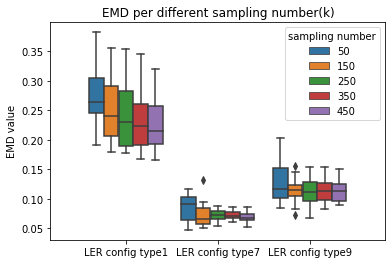

In [25]:
f = sns.boxplot(x=factor068[:,0].astype(int), y=factor068[:,2], hue=factor068[:,1].astype(int))
f.set_ylabel('EMD value')
f.legend(title="sampling number")

plt.title('EMD per different sampling number(k)')
plt.xticks([0,1,2], ['LER config type1', 'LER config type7',  'LER config type9'])
plt.plot()

# plt.savefig('paper_result/num_in_cycle_EMD_fig.png')

In [ ]:
import seaborn as sns

sns.boxplot(x=true_vs_true_EMDs_set[:,0].astype(int), y=true_vs_true_EMDs_set[:,2], hue=true_vs_true_EMDs_set[:,1].astype(int))
plt.show()

In [ ]:
EMD_element = np.zeros((10*20, 3))

for i in range(10):
    for j in range(10):
        EMD_element[10*i+j, 0] = j
        EMD_element
        

In [24]:
np.mean(result_total, axis=0)

array([0.23019361, 0.16472518, 0.2050434 , 0.20150969, 0.20367673,
       0.17017566, 0.06600316, 0.16912136, 0.11813598, 0.08065658])

In [25]:
np.std(result_total, axis=0)

array([0.02736001, 0.03105772, 0.03214527, 0.01892219, 0.02780586,
       0.03895784, 0.00937325, 0.0265723 , 0.01462277, 0.00880808])